# Animal Sleep

Some animals, such as elephants, sleep only 3-4 hours a night, while others, like bats, can sleep up to 20 hours.

Is there a relationship between sleep duration and body mass? Is a species' diet correlated with sleep time?

The file `animal-sleep.csv` provides data on the average sleep duration of 77 animal species, along with their average body mass in kilograms.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from linear_model import LinearModel

df = pd.read_csv('animal-sleep.csv')
df.head()

,animal,diet,sleep,mass
0,african elephant,herbivore,3.3,6654.000
1,african giant pouched rat,omnivore,8.3,1.000
2,african striped mouse,herbivore,8.7,0.044
3,arctic fox,carnivore,12.5,3.380
4,arctic ground squirrel,omnivore,16.6,0.920


Text(0, 0.5, 'hours of sleep per day')

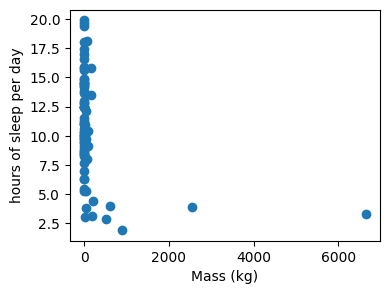

In [2]:
plt.figure(figsize=(4, 3))
plt.scatter(df['mass'], df['sleep'])
plt.xlabel('Mass (kg)')
plt.ylabel('hours of sleep per day')

We see that the mass data exhibits a strong right skew with a long tail. A log transformation can convert an exponential relationship into a linear one, making it easier to model with linear regression.

In [3]:
import math
df['log10_mass'] = df['mass'].apply(math.log10)  # apply the function to each element
df.head()

,animal,diet,sleep,mass,log10_mass
0,african elephant,herbivore,3.3,6654.000,3.823083
1,african giant pouched rat,omnivore,8.3,1.000,0.000000
2,african striped mouse,herbivore,8.7,0.044,-1.356547
3,arctic fox,carnivore,12.5,3.380,0.528917
4,arctic ground squirrel,omnivore,16.6,0.920,-0.036212


Below is code for plotting the data using the log scale.
- Model the relationship between `log10_mass` and hours of `sleep`.

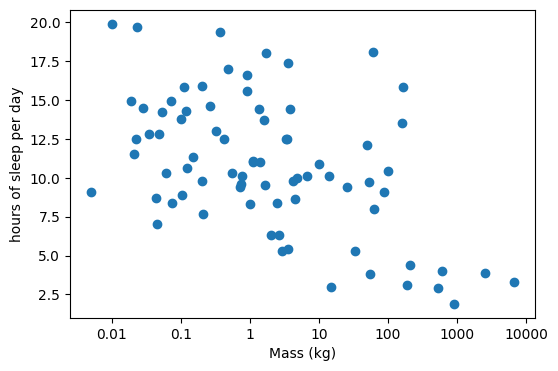

In [4]:
plt.figure(figsize=(6, 4))
plt.scatter(df['log10_mass'], df['sleep'])
plt.xlabel('Mass (kg)')
plt.ylabel('hours of sleep per day')
xticks = [-2, -1, 0, 1, 2, 3, 4]
xtick_labels = [0.01, 0.1, 1, 10, 100, 1000, 10000]
plt.xticks(xticks, xtick_labels)
plt.show()

### Project Ideas

- Model the relationship between `log10_mass` and hours of `sleep`.

- Create three separate linear models for each `diet` category: carnivores, omnivores, and herbivores.

- Visualize the data and their best-fit lines on a single plot with distinct colors and symbols for each `diet` category, or use separate plots if more suitable.

- Create three separate linear models for each `diet` category: carnivores, omnivores, and herbivores.

Text(4, 1, 'herbivores')

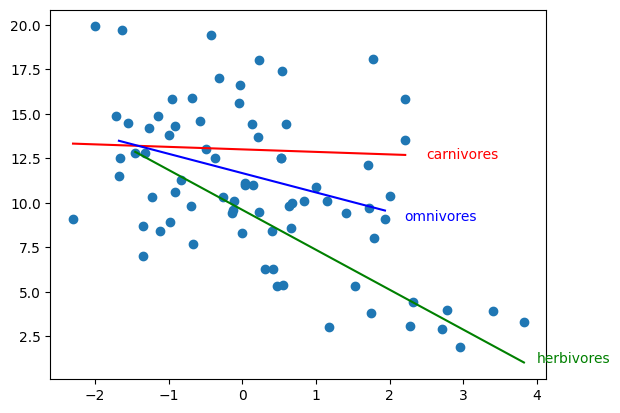

In [19]:
# Df creations
carnivores_df = df.query('diet == "carnivore"')
omnivores_df = df.query('diet == "omnivore"')
herbivores_df = df.query('diet == "herbivore"')

# Visualization
plt.scatter(df['log10_mass'], df['sleep'])

# Models
carnivores = LinearModel()
carnivores.fit(x=carnivores_df['log10_mass'], y=carnivores_df['sleep'])
carnivores.plot_model(carnivores_df['log10_mass'].min(), carnivores_df['log10_mass'].max(), color='red')
plt.text(2.5, 12.5, s='carnivores', color='red')

omnivores = LinearModel()
omnivores.fit(x=omnivores_df['log10_mass'], y=omnivores_df['sleep'])
omnivores.plot_model(omnivores_df['log10_mass'].min(), omnivores_df['log10_mass'].max(), color='blue')
plt.text(2.2, 9, s='omnivores', color='blue')

herbivores = LinearModel()
herbivores.fit(x=herbivores_df['log10_mass'], y=herbivores_df['sleep'])
herbivores.plot_model(herbivores_df['log10_mass'].min(), herbivores_df['log10_mass'].max(), color='green')
plt.text(4, 1, s='herbivores', color='green')